<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/waveFunction_anim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Wave Function</h1></b>

Dr. Bingsen Wang

5/31/2025
</center>

#Python Code

0
0
50
100
150
200
250
300
350
400
450
500
550
0


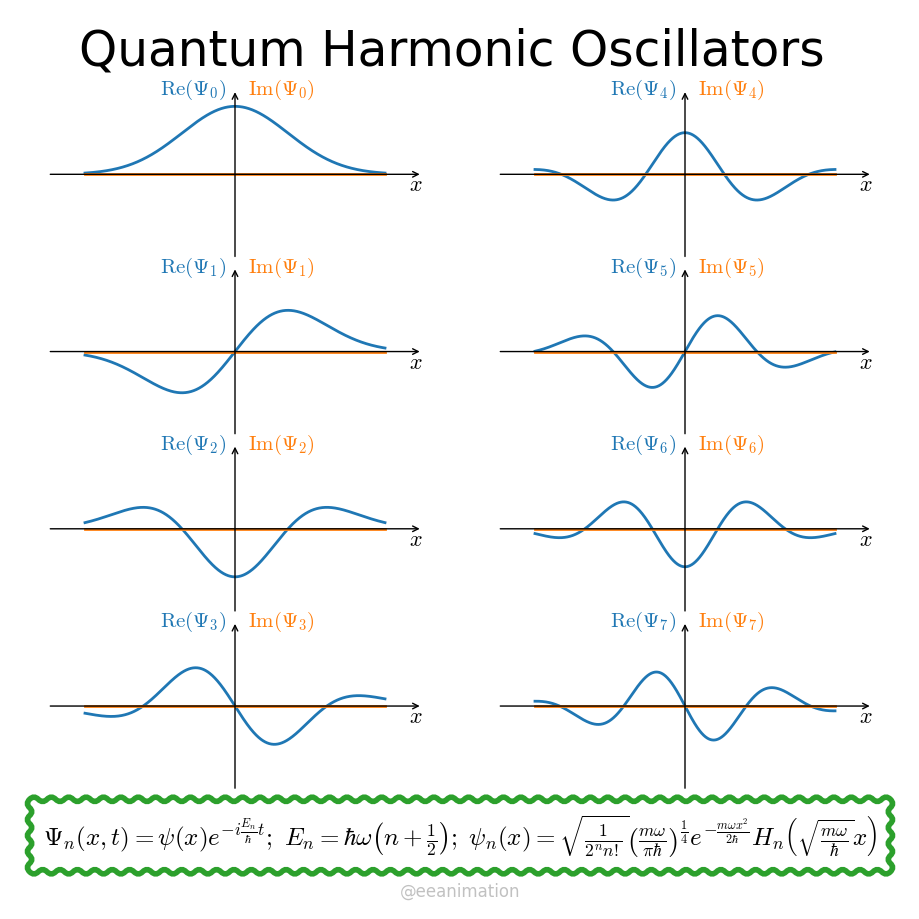

In [75]:
from matplotlib import pyplot,animation,cm
from scipy.special import hermite,factorial
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})
def psi(n,x):
  return 1/np.sqrt(2**n*factorial(n))*hermite(n)(x)*np.exp(-x**2)
def Psi_c(n,x,t):
  return psi(n,x)*np.exp(-1j*(n+.5)*t)

Nf=600
xmax=2;x=np.linspace(-xmax,xmax,1000)
t=np.linspace(0,2*np.pi,Nf)
xlim=[-1.2,1.2];ylim=[-1.2,1.25]
nr,nc=4,2
w,h=(xlim[1]-xlim[0]-.4)/nc,(ylim[1]-ylim[0]-.6)/nr
xy=[-.6,.8]

cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=xlim,ylim=ylim);ax.axis('off')
ax.text(0,1.1,'Quantum Harmonic Oscillators ',size=35,ha='center')
ax.text(0,-1,r'$\Psi_n(x,t)=\psi(x)e^{-i\frac{E_n}{\hbar}t};\ E_n = \hbar\omega\left(n+\frac{1}{2}\right);\ $'+#'\n'+
        r'$\psi_n(x)=\sqrt{\frac{1}{2^n n!}}\left(\frac{m\omega}{\pi\hbar}\right)^{\frac{1}{4}} e^{-\frac{m\omega x^2}{2\hbar}}H_n\left(\sqrt{\frac{m\omega}{\hbar}}x\right)$'
        ,size=18,ha='center',va='center',multialignment='center',bbox=dict(boxstyle='roundtooth',pad=.7,facecolor='none',edgecolor=cl[2],lw=4))

[ax.annotate('',(xy[0]+w/2+(w+.2)*(k//nr),xy[1]-(h+.02)*(k%nr)),(xy[0]-w/2+(w+.2)*(k//nr),xy[1]-(h+.02)*(k%nr)),arrowprops={'arrowstyle':'->'}) for k in range(nc*nr)]
[ax.text(*(xy[0]+w/2+(w+.2)*(k//nr),xy[1]-(h+.02)*(k%nr)),'$x$',size=16,ha='right',va='top') for k in range(nc*nr)]
[ax.annotate('',(xy[0]+(w+.2)*(k//nr),xy[1]+h/2-(h+.02)*(k%nr)),(xy[0]+(w+.2)*(k//nr),xy[1]-h/2-(h+.02)*(k%nr)),arrowprops={'arrowstyle':'->'}) for k in range(nc*nr)]
[ax.text(*(xy[0]+(w+.2)*(k//nr),xy[1]+h/2-(h+.02)*(k%nr)),rf'$\text{{Re}}(\Psi_{{{k}}})$  ',size=15,c=cl[0],ha='right',va='center') for k in range(nc*nr)]
[ax.text(*(xy[0]+(w+.2)*(k//nr),xy[1]+h/2-(h+.02)*(k%nr)),rf'  $\text{{Im}}(\Psi_{{{k}}})$',size=15,c=cl[1],ha='left',va='center') for k in range(nc*nr)]
lines=[ax.plot([],[],c=cl[k%2],lw=2)[0] for k in range(nc*nr*2)]

def animate(i):
  if i%50==0: print(i)
  for k in range(nc*nr):
    lines[2*k].set_data(x/xmax*w/2*.8+xy[0]+(w+.2)*(k//nr),np.real(Psi_c(k,x,t[i]))*h/2*.8+xy[1]-(h+.02)*(k%nr))
    lines[2*k+1].set_data(x/xmax*w/2*.8+xy[0]+(w+.2)*(k//nr),np.imag(Psi_c(k,x,t[i]))*h/2*.8+xy[1]-(h+.02)*(k%nr))
  return
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
anim.save("wavefunction.mp4",writer=animation.FFMpegWriter(fps=50),dpi=200)